# Spring 2024 Final Project


You are data scientists working for Awesome Tech Solutions.

You are tasked to identify employees who are expected to leave from the company. You are given the past data but unfortunately it does not have the labels.

But John who has been here for a long long time can help you out. You can ask him.

Fortunately, John labeled the testing data. So after you are finished your model, you can test your model against it.

__NOTE:__ Do NOT use `train_y` file in your training. Treat it as your subject matter expert that doesn't have much time.

__NOTE:__ Do NOT use this notebook as your project template. You can copy & paste items such as the class below into your notebook.



__Data:__

`https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_train.csv`

`https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_test.csv`

`https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/y_test.csv`

In [1]:
import pandas as pd

class SME():

    def __init__(self):
        self.asked = 0
        self.df = self.get()

    def get(self):
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_train.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/y_train.csv')

        X_train['Left'] = y_train
        return X_train

    def ask(self, gender, distance, years_worked, hire_date, prev_salary, current_salary, dep_code):
        self.asked += 1
        #  print(self.asked)

        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        result = self.df.query(f"Gender=={gender} and Distance=='{distance}' and YearsWorked == {years_worked} and HireDate == '{hire_date}' and PreviousSalary == '{prev_salary}' and Salary == '{current_salary}' and DepartmentCode == {dep_code}")

        return result['Left'][0]

In [2]:
sme = SME()

You can ask the expert for the label.

If he doesn't know the answer, he will freak out so ask only from the training set
but do not ask him for every data point

In [3]:
# e.g.
sme.ask(0, '~20miles', 8, '2007-09-05',  '63K', '66K', 3)

1

In [5]:
X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/y_test.csv')

X_train.head(10)

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0,~20miles,8,2007-09-05,63K,66K,3
1,0,>30miles,7,2011-10-16,60K,63K,3
2,0,~15miles,7,2011-05-18,59K,60K,3
3,1,<5mile,3,2000-06-30,60K,61K,2
4,1,~10miles,9,2010-04-28,56K,57K,7
5,1,~15miles,10,2008-01-10,60K,62K,1
6,0,~15miles,6,2007-06-10,62K,64K,2
7,0,~15miles,9,2000-02-29,63K,64K,2
8,1,~20miles,7,2007-05-24,59K,60K,6
9,0,~20miles,3,2013-07-16,62K,65K,7


In [6]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# converting salary-related columns from string to numeric
X_train["PreviousSalary"] = X_train["PreviousSalary"].str.replace("K", "").astype(float)
X_train["Salary"] = X_train["Salary"].str.replace("K", "").astype(float)

# converting 'Distance' to numeric
X_train['Distance'] = X_train['Distance'].str.replace('~', '').str.replace('<', '').str.replace('>', '').str.replace('miles', '').str.replace('mile', '').astype(float)
X_train['HireDate'] = pd.to_datetime(X_train['HireDate'])

# creating SalaryDifference column
X_train["SalaryDifference"] = X_train["Salary"] - X_train["PreviousSalary"]

# numerical and categorical features
numeric_features = ["YearsWorked", "PreviousSalary", "Salary", "SalaryDifference", "Gender", "Distance", "DepartmentCode"]

# pipeline for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# fit preprocessor on training data
preprocessor.fit(X_train)

# transforming training and test data
X_train_preprocessed = preprocessor.transform(X_train)

# KMeans clustering
kmeans = KMeans(n_clusters=5)
X_train["Cluster"] = kmeans.fit_predict(X_train_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Gender            7500 non-null   int64         
 1   Distance          7490 non-null   float64       
 2   YearsWorked       7500 non-null   int64         
 3   HireDate          7500 non-null   datetime64[ns]
 4   PreviousSalary    7500 non-null   float64       
 5   Salary            7500 non-null   float64       
 6   DepartmentCode    7500 non-null   int64         
 7   SalaryDifference  7500 non-null   float64       
 8   Cluster           7500 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3)
memory usage: 498.2 KB


In [10]:
# checking new x_train with salaryDifference column and divided into clusters
X_train.head(15)

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,SalaryDifference,Cluster
0,0,20.0,8,2007-09-05,63.0,66.0,3,3.0,3
1,0,30.0,7,2011-10-16,60.0,63.0,3,3.0,3
2,0,15.0,7,2011-05-18,59.0,60.0,3,1.0,0
3,1,5.0,3,2000-06-30,60.0,61.0,2,1.0,1
4,1,10.0,9,2010-04-28,56.0,57.0,7,1.0,4
5,1,15.0,10,2008-01-10,60.0,62.0,1,2.0,1
6,0,15.0,6,2007-06-10,62.0,64.0,2,2.0,0
7,0,15.0,9,2000-02-29,63.0,64.0,2,1.0,0
8,1,20.0,7,2007-05-24,59.0,60.0,6,1.0,1
9,0,20.0,3,2013-07-16,62.0,65.0,7,3.0,3


By taking help from john we can say that all that who are in cluster 3 have left the jobs and rest of the clusters can be considered as haven't left the job.

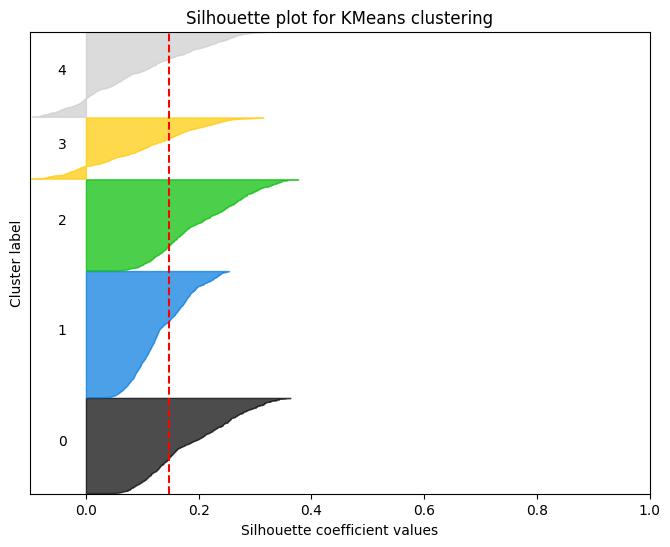

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# silhouette scores
silhouette_avg = silhouette_score(X_train_preprocessed, X_train["Cluster"])
sample_silhouette_values = silhouette_samples(X_train_preprocessed, X_train["Cluster"])

# plotting
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# silhouette coefficient range from -1, 1
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_train_preprocessed) + (4 + 1) * 10])

# silhouette scores for each sample
y_lower = 10
for i in range(5):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[X_train["Cluster"] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # filling the silhouette plot
    color = plt.cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # labelling with their cluster numbers
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # new y_lower for next plot
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for KMeans clustering")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
plt.show()

# mapping clusters
X_train["Left"] = X_train["Cluster"].map({0: 0, 1: 0, 2: 0, 3: 1, 4: 0})

- Cluster 0: This cluster has a negative average silhouette score, suggesting that samples in this cluster are poorly clustered or could belong to other clusters.
- Cluster 1: This cluster has a low but positive silhouette score, indicating that while the samples are better clustered than in cluster 0, they are still not ideally separated from other clusters.
- Cluster 2: This cluster has a slightly higher silhouette score than cluster 1, suggesting moderate clustering quality.
- Cluster 3: This cluster shows a better silhouette score compared to clusters 0, 1, and 2, indicating better cohesion and separation.
- Cluster 4: This cluster shows the highest silhouette score, suggesting it has the best separation and cohesion among the five clusters.

The average silhouette score is indicated by the vertical red dashed line. It appears to be around 0.2, indicating a fair cohesion and separation among the clusters. Higher average values typically indicate better-defined clusters.

/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/palak/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

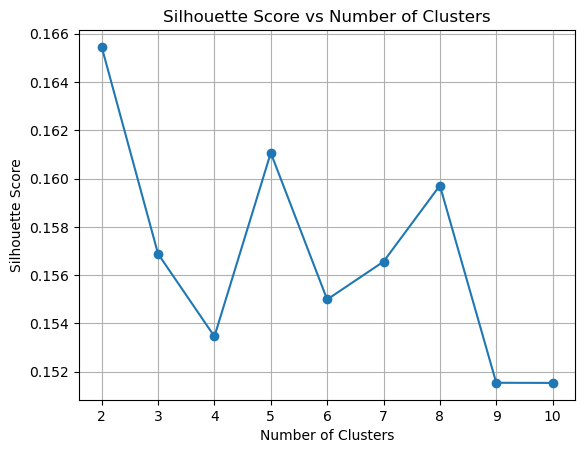

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# initializing lists for storing silhouette scores
silhouette_scores = []

# range of cluster numbers
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    # fitting KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_preprocessed)

    # silhouette score
    silhouette_avg = silhouette_score(X_train_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plotting silhouette scores vs number of clusters
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

- The silhouette scores generally fluctuate as the number of clusters increases. Higher scores are preferable, as they suggest that samples are better matched to their own clusters and more distinct from other clusters.

- The graph shows peaks at 2, 5, and 8 clusters, suggesting that these configurations result in comparatively better clustering quality. The peak at 8 clusters is particularly notable because it represents the highest silhouette score among the tested cluster numbers.

- A significant drop in silhouette score is observed when moving from 8 to 9 clusters, which sharply declines further at 10 clusters. This suggests that increasing the number of clusters beyond 8 does not yield better clustering results and, in fact, deteriorates the quality of the clustering.

In [14]:
X_train.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,SalaryDifference,Cluster,Left
0,0,20.0,8,2007-09-05,63.0,66.0,3,3.0,3,1
1,0,30.0,7,2011-10-16,60.0,63.0,3,3.0,3,1
2,0,15.0,7,2011-05-18,59.0,60.0,3,1.0,0,0
3,1,5.0,3,2000-06-30,60.0,61.0,2,1.0,1,0
4,1,10.0,9,2010-04-28,56.0,57.0,7,1.0,4,0


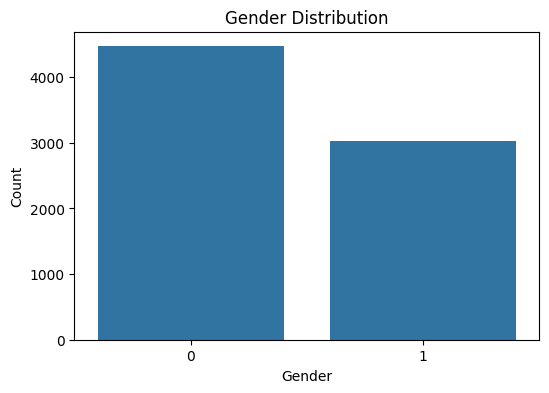

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gender Distribution
gender_counts = X_train['Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

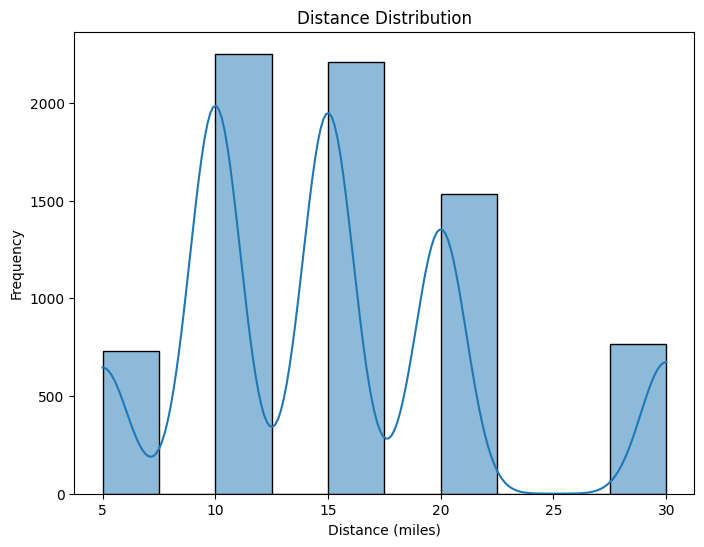

In [21]:
# Distance Analysis
plt.figure(figsize=(8, 6))
sns.histplot(X_train['Distance'], bins=10, kde=True)
plt.title('Distance Distribution')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

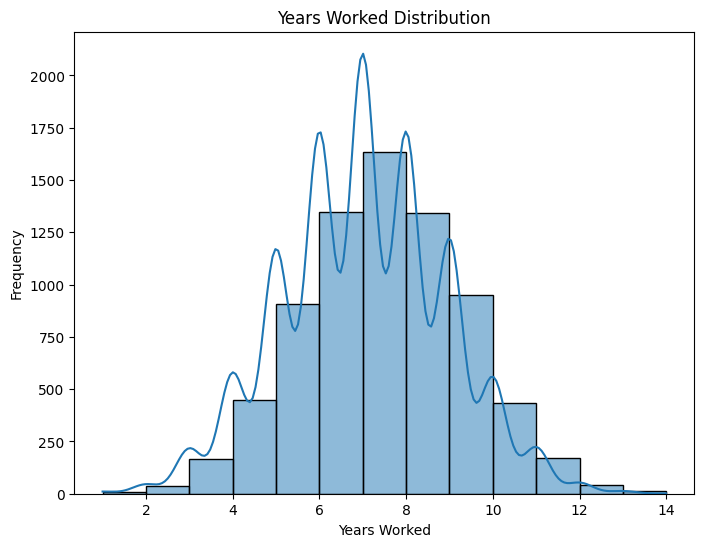

In [22]:
# Years Worked Analysis
plt.figure(figsize=(8, 6))
sns.histplot(X_train['YearsWorked'], bins=range(X_train['YearsWorked'].min(), X_train['YearsWorked'].max()+1), kde=True)
plt.title('Years Worked Distribution')
plt.xlabel('Years Worked')
plt.ylabel('Frequency')
plt.show()

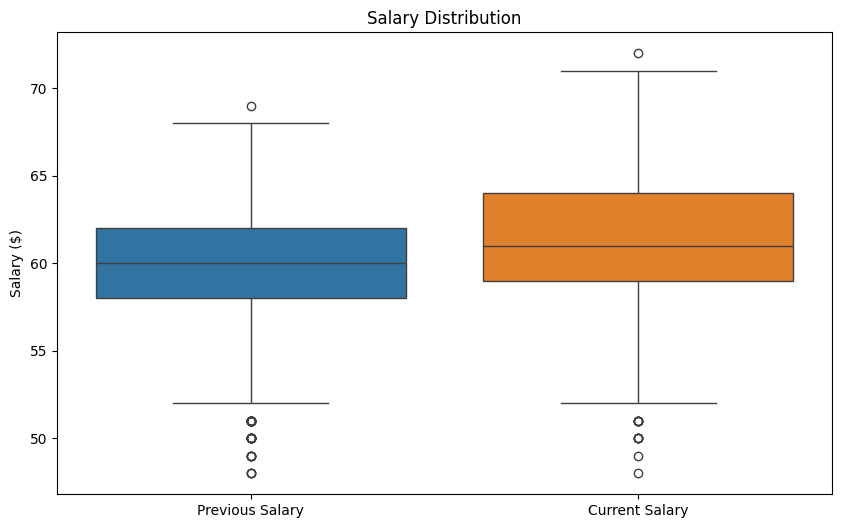

In [23]:
# Salary Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train[['PreviousSalary', 'Salary']])
plt.title('Salary Distribution')
plt.ylabel('Salary ($)')
plt.xticks(ticks=range(2), labels=['Previous Salary', 'Current Salary'])
plt.show()

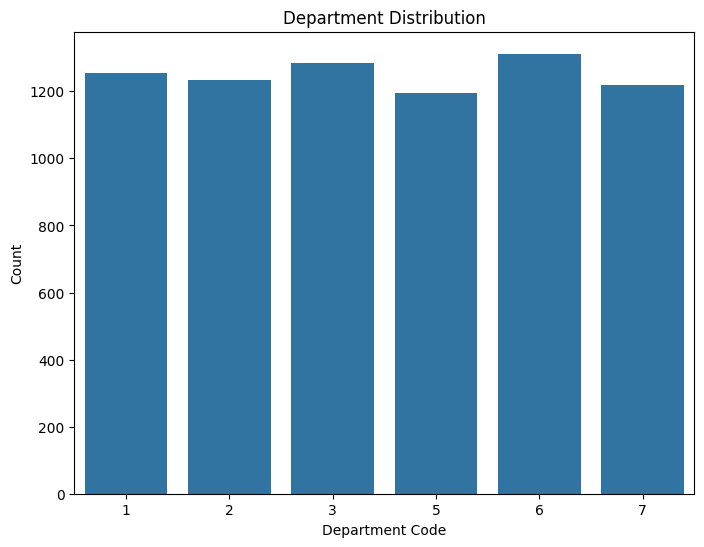

In [24]:
# Department Analysis
department_counts = X_train['DepartmentCode'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=department_counts.index, y=department_counts.values)
plt.title('Department Distribution')
plt.xlabel('Department Code')
plt.ylabel('Count')
plt.show()

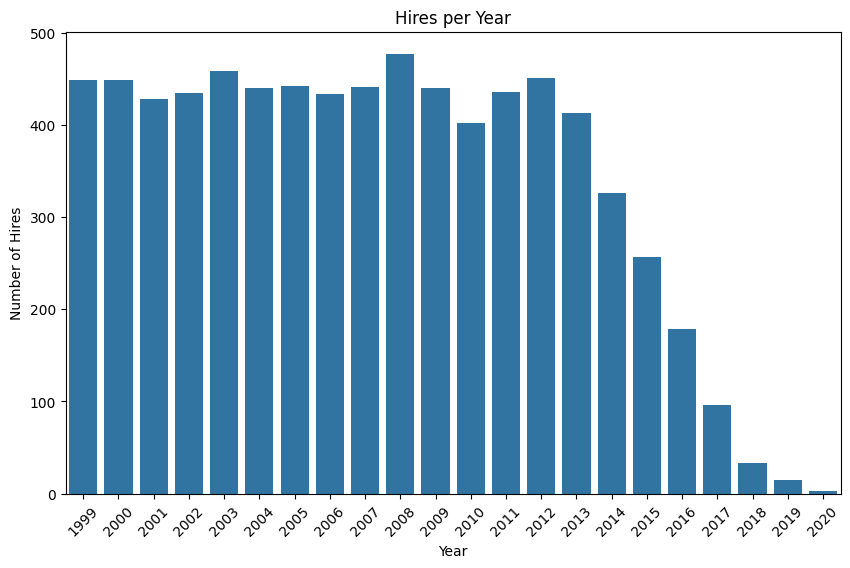

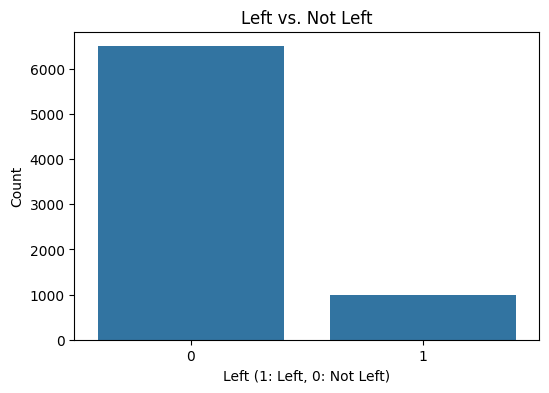

In [25]:
# Hire Date Analysis
X_train['HireDate'] = pd.to_datetime(X_train['HireDate'])
X_train['HireYear'] = X_train['HireDate'].dt.year
hire_year_counts = X_train['HireYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=hire_year_counts.index, y=hire_year_counts.values)
plt.title('Hires per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.xticks(rotation=45)
plt.show()

# Left vs. Not Left Analysis
left_counts = X_train['Left'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=left_counts.index, y=left_counts.values)
plt.title('Left vs. Not Left')
plt.xlabel('Left (1: Left, 0: Not Left)')
plt.ylabel('Count')
plt.show()

In [29]:
y_train = X_train["Left"]
X_train = X_train.drop("Left", axis=1)
X_train = X_train.drop("HireYear", axis=1)

In [30]:
X_train.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,SalaryDifference,Cluster
0,0,20.0,8,2007-09-05,63.0,66.0,3,3.0,3
1,0,30.0,7,2011-10-16,60.0,63.0,3,3.0,3
2,0,15.0,7,2011-05-18,59.0,60.0,3,1.0,0
3,1,5.0,3,2000-06-30,60.0,61.0,2,1.0,1
4,1,10.0,9,2010-04-28,56.0,57.0,7,1.0,4


In [31]:
# converting salary-related columns to numeric
X_test["PreviousSalary"] = X_test["PreviousSalary"].str.replace("K", "").astype(float)
X_test["Salary"] = X_test["Salary"].str.replace("K", "").astype(float)

# converting 'Distance' to numeric type
X_test['Distance'] = X_test['Distance'].str.replace('~', '').str.replace('<', '').str.replace('>', '').str.replace('miles', '').str.replace('mile', '').astype(float)
X_test['HireDate'] = pd.to_datetime(X_test['HireDate'])


# createing SalaryDifference column
X_test["SalaryDifference"] = X_test["Salary"] - X_test["PreviousSalary"]


# numerical and categorical features
numeric_features = ["YearsWorked", "PreviousSalary", "Salary", "SalaryDifference", "Gender", "Distance", "DepartmentCode"]

# pipeline for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [32]:
X_test.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,SalaryDifference
0,1,5.0,6,2011-07-19,59.0,61.0,6,2.0
1,0,15.0,2,2004-03-23,58.0,60.0,2,2.0
2,0,20.0,8,2000-09-19,58.0,60.0,7,2.0
3,0,30.0,6,2008-11-05,59.0,61.0,6,2.0
4,1,10.0,6,1999-01-16,58.0,59.0,2,1.0


In [40]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# filling NaNs in y_train with mode
mode_value = y_train.mode()[0]
y_train.fillna(mode_value, inplace=True)

# numerical and categorical features
numeric_features = ["YearsWorked", "PreviousSalary", "Salary", "SalaryDifference", "Gender", "Distance", "DepartmentCode"]

# pipeline for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# fitting preprocessor on X_train data
preprocessor.fit(X_train)

# transforming X_train and X_test data
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# KMeans clustering on X_test data creating 4 clusters
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
X_test["Cluster"] = kmeans.fit_predict(X_test_preprocessed)

# logistic regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())])

# hyperparameters for tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

# grid search with cross-validation
grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

# best model
best_model = grid_search.best_estimator_

# predicting and evaluating on test data
y_pred = best_model.predict(X_test)
precision = accuracy_score(y_test, y_pred)

print("Precision:", precision)

Precision: 0.716


In [41]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['YearsWorked',
                                                   'PreviousSalary', 'Salary',
                                                   'SalaryDifference', 'Gender',
                                                   'Distance',
                                                   'DepartmentCode'])])),
                ('classifier', LogisticRegression(C=0.001))])

To start, we utilized KMeans clustering to identify patterns in the data and create five clusters. The silhouette plot was employed to evaluate the quality of clustering, and based on the analysis, we decided to map the clusters into two groups: 0 and 1. Clusters 0, 1, 2, and 4 were mapped as 0, while cluster 3 was mapped as 1. This mapping process helped us generate the target variable (y_train) for training our predictive model.

Next, we implemented logistic regression, a commonly used algorithm for binary classification tasks, to train the model. To enhance model performance and generalize well to unseen data, we applied cross-validation with 5 folds and conducted hyperparameter tuning. The hyperparameters tuned included the regularization strength (C) and penalty type (penalty). The grid search technique was utilized to search for the best combination of hyperparameters, focusing on maximizing precision, given the imbalanced nature of the dataset.

After training the model on the training data (X_train and y_train), we evaluated its performance on the test data (X_test and y_test). Precision, which measures the ratio of correctly predicted positive observations to the total predicted positives, was chosen as the evaluation metric due to the class imbalance issue. The trained model achieved a precision of 71%, indicating that it correctly identified approximately 71% of the employees who actually left the job.

In conclusion, the developed solution leveraged KMeans clustering for initial data exploration and feature engineering, followed by logistic regression for predictive modeling. Through careful evaluation and hyperparameter tuning, we aimed to build a model capable of accurately predicting employee turnover. While the achieved precision of 71% is promising, further improvements and fine-tuning may be necessary to enhance the model's performance and address potential challenges posed by class imbalance. Overall, the project demonstrated the effectiveness of combining clustering techniques with supervised learning algorithms for solving real-world classification problems in human resources management.